# Churn Modelling  
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [1]:
import kaggle
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve,accuracy_score

In [3]:
# Descargar el dataset utilizando la API de Kaggle
custom_path = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\03_Machine_Learning\Laboratorios\Data'
kaggle.api.dataset_download_files('shrutimechlearn/churn-modelling', path=custom_path, unzip=True)
files = os.listdir(custom_path)
print("Archivos descargados:", files)


Dataset URL: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling
Archivos descargados: ['apple_quality.csv', 'Churn_Modelling.csv']


In [4]:
# Declarar DF
file_path = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\03_Machine_Learning\Laboratorios\Data\Churn_Modelling.csv'
df = pd.read_csv(file_path)
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [5]:
# Tamaño del DF
print(f"El tamaño del dataset es {df.shape}")

El tamaño del dataset es (10000, 14)


In [6]:
# Tipos de datos y composición de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Solo a modo de verificación
missing_values = df[df.isnull().any(axis=1)]
print(missing_values)


Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [8]:
# Manejo de datos
df.drop(columns=['Surname'], inplace=True)

In [9]:
df.describe() 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='Exited'>

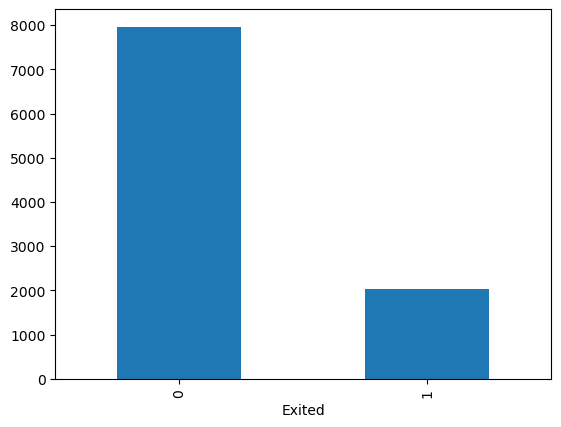

In [10]:
# Distribución variable objetivo
df['Exited'].value_counts().plot(kind = 'bar')

In [11]:
# Manejo para modelos
X = df.drop(columns=['Exited'])
y = df['Exited']

In [12]:
# Manejo para modelos
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)


In [13]:
# División manteniendo proporciones de variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)


In [14]:
# Algoritmo regresión logistica
logistic_model = LogisticRegression(max_iter=200) 
logistic_model.fit(X_train, y_train)
# Predicciones
y_pred_LogR = logistic_model.predict(X_test)
# Metricas
accuracy_logistic = accuracy_score(y_test, y_pred_LogR)
auc_logistic= roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_LogR)
classification_report_logistic = classification_report(y_test, y_pred_LogR)
print(accuracy_logistic)
print(auc_logistic )
print(confusion_matrix_logistic)
print(classification_report_logistic)

0.7735
0.7358236510778883
[[1517   76]
 [ 377   30]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1593
           1       0.28      0.07      0.12       407

    accuracy                           0.77      2000
   macro avg       0.54      0.51      0.49      2000
weighted avg       0.70      0.77      0.72      2000



In [15]:
# Algoritmo Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)

# Metricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf= roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
print(accuracy_logistic)
print(auc_logistic )
print(confusion_matrix_logistic)
print(classification_report_logistic)

0.7735
0.7358236510778883
[[1517   76]
 [ 377   30]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1593
           1       0.28      0.07      0.12       407

    accuracy                           0.77      2000
   macro avg       0.54      0.51      0.49      2000
weighted avg       0.70      0.77      0.72      2000



In [16]:
# Algoritmo XGBoost
xgb_model = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])  # Usar probabilidades para AUC
xgb_confusion_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_classification_report = classification_report(y_test, y_pred_xgb)

print(xgb_accuracy)
print(xgb_auc)
print(xgb_confusion_matrix)
print(xgb_classification_report)

0.8445
0.8394696699781445
[[1435  158]
 [ 153  254]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.62      0.62      0.62       407

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.84      0.84      2000



C:\Users\csolis\AppData\Local\Temp\ipykernel_12752\786819538.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax[0], palette='viridis')
C:\Users\csolis\AppData\Local\Temp\ipykernel_12752\786819538.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC', data=metrics_df, ax=ax[1], palette='viridis')


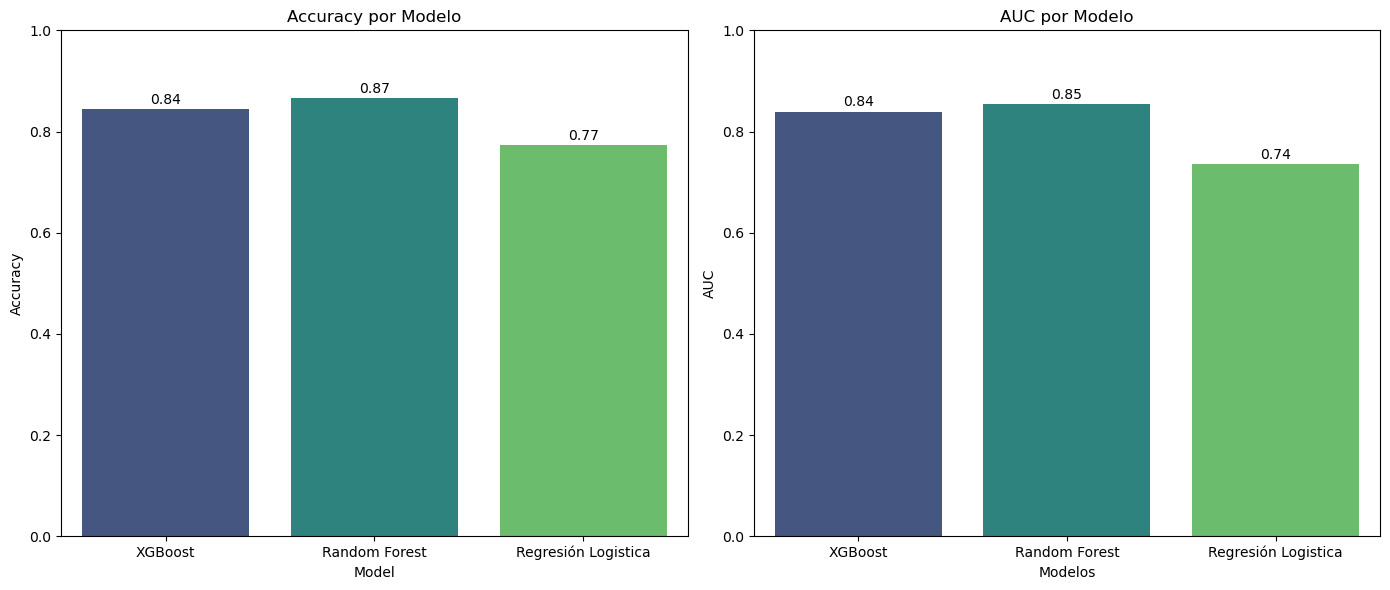

In [17]:
# Comparación Metricas
metrics = {
    'Model': ['XGBoost', 'Random Forest', 'Regresión Logistica'],
    'Accuracy': [xgb_accuracy, accuracy_rf, accuracy_logistic],
    'AUC': [xgb_auc, auc_rf, auc_logistic]
}

# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics)

#Visualización
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de precisión
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax[0], palette='viridis')
ax[0].set_title('Accuracy por Modelo')
ax[0].set_ylim(0, 1)  # Limitar el eje y entre 0 y 1
ax[0].set_ylabel('Accuracy')
ax[1].set_xlabel('Modelos')
for i in range(len(metrics_df)):
    ax[0].text(i, metrics_df['Accuracy'][i] + 0.01, f'{metrics_df["Accuracy"][i]:.2f}', ha='center')
# Gráfico de AUC
sns.barplot(x='Model', y='AUC', data=metrics_df, ax=ax[1], palette='viridis')
ax[1].set_title('AUC por Modelo')
ax[1].set_ylim(0, 1)  
ax[1].set_ylabel('AUC')
ax[1].set_xlabel('Modelos')
for i in range(len(metrics_df)):
    ax[1].text(i, metrics_df['AUC'][i] + 0.01, f'{metrics_df["AUC"][i]:.2f}', ha='center')
plt.tight_layout()
plt.show()

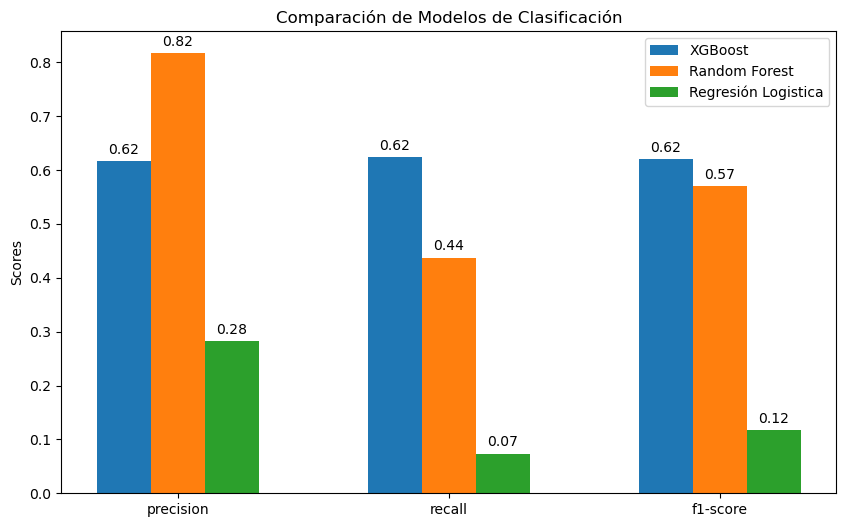

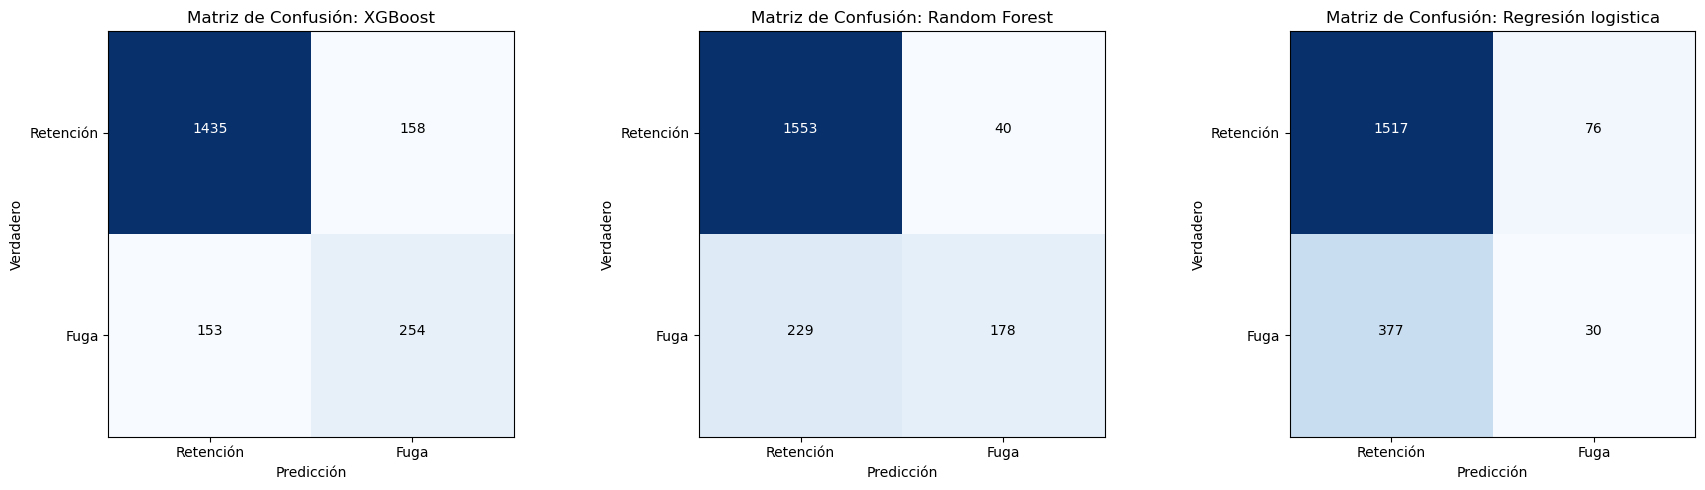

In [23]:
# Generar informes de clasificación
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_LogR = classification_report(y_test, y_pred_LogR, output_dict=True)

# Extraer métricas clave
metrics = ['precision', 'recall', 'f1-score']
models = ['XGBoost', 'Random Forest', 'Regresión logistica']

# Preparar datos para el gráfico de barras
data = np.array([[report_xgb['1'][metric] for metric in metrics],
                 [report_rf['1'][metric] for metric in metrics],
                 [report_LogR['1'][metric] for metric in metrics]])

# Crear gráfico de barras
x = np.arange(len(metrics))  # la posición de las métricas
width = 0.2  # el ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
bars_xgb = ax.bar(x - width, data[0], width, label='XGBoost')
bars_rf = ax.bar(x, data[1], width, label='Random Forest')
bars_other = ax.bar(x + width, data[2], width, label='Regresión Logistica')

# Añadir etiquetas y título
ax.set_ylabel('Scores')
ax.set_title('Comparación de Modelos de Clasificación')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Añadir etiquetas de valor a las barras
for bars in [bars_xgb, bars_rf, bars_other]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

# Matrices de confusión
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for ax, y_pred, model_name in zip(axs, [y_pred_xgb, y_pred_rf, y_pred_LogR], models):
    cm = confusion_matrix(y_test, y_pred)
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f'Matriz de Confusión: {model_name}')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Verdadero')
    tick_marks = np.arange(2)
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(['Retención', 'Fuga'])
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(['Retención', 'Fuga'])

    # Añadir etiquetas de conteo
    threshold = cm.max() / 2.  # Umbral para el color
    for i, j in np.ndindex(cm.shape):
        ax.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.show()


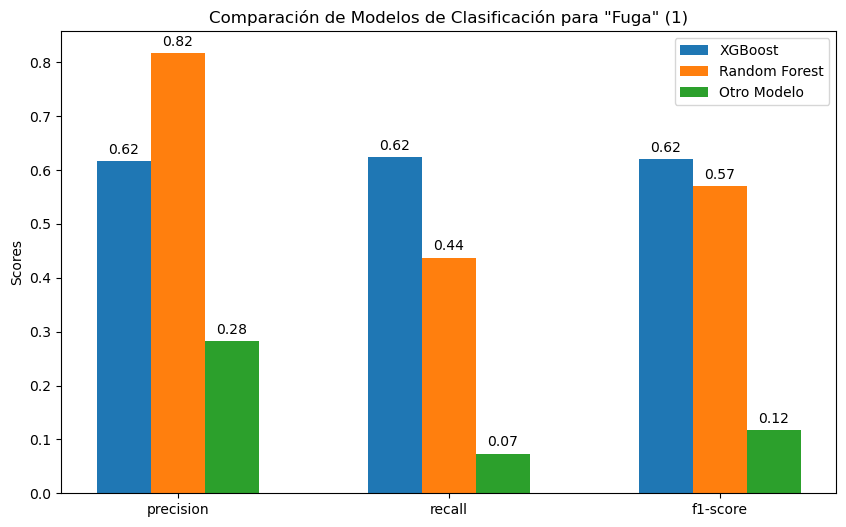

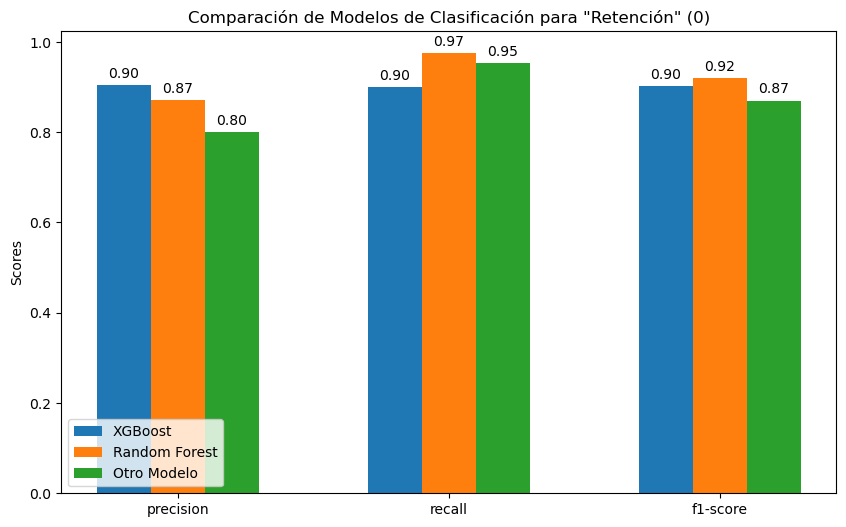

In [22]:
# Metricas especificas

report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_LogR = classification_report(y_test, y_pred_LogR, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
models = ['XGBoost', 'Random Forest', 'Regresión Logistica']

# Por clase
data = np.array([[report_xgb['1'][metric] for metric in metrics],
                 [report_rf['1'][metric] for metric in metrics],
                 [report_LogR['1'][metric] for metric in metrics]])

data_0 = np.array([[report_xgb['0'][metric] for metric in metrics],
                   [report_rf['0'][metric] for metric in metrics],
                   [report_LogR['0'][metric] for metric in metrics]])

# Fuga
x = np.arange(len(metrics)) 
width = 0.2  
fig, ax = plt.subplots(figsize=(10, 6))
bars_xgb = ax.bar(x - width, data[0], width, label='XGBoost')
bars_rf = ax.bar(x, data[1], width, label='Random Forest')
bars_other = ax.bar(x + width, data[2], width, label='Otro Modelo')
ax.set_ylabel('Scores')
ax.set_title('Comparación de Modelos de Clasificación para "Fuga" (1)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
for bars in [bars_xgb, bars_rf, bars_other]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

# Retención
fig, ax = plt.subplots(figsize=(10, 6))
bars_xgb_0 = ax.bar(x - width, data_0[0], width, label='XGBoost')
bars_rf_0 = ax.bar(x, data_0[1], width, label='Random Forest')
bars_other_0 = ax.bar(x + width, data_0[2], width, label='Otro Modelo')
ax.set_ylabel('Scores')
ax.set_title('Comparación de Modelos de Clasificación para "Retención" (0)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
for bars in [bars_xgb_0, bars_rf_0, bars_other_0]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()



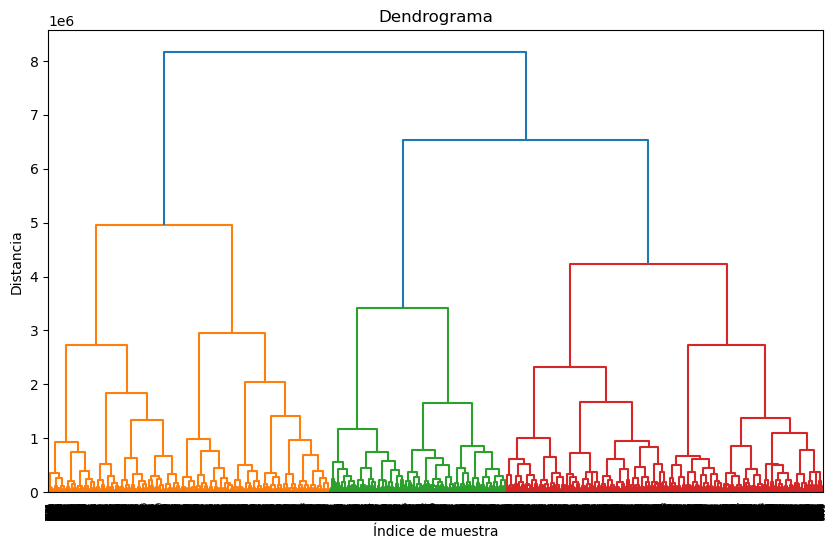

In [20]:
# Algoritmo no supervisado 
Z = linkage(X, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()
